In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


#Step 1: Load the Dataset

In [2]:
df=pd.read_csv("baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

#Step 2: Explore the Dataset

<Axes: >

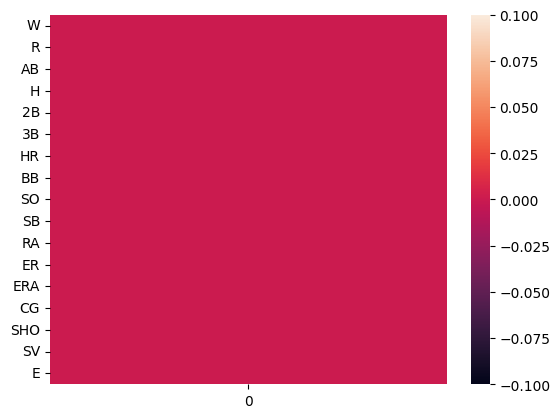

In [5]:
sns.heatmap(df.isnull().sum().to_frame()) #null values data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#Step 3:Data Visualization

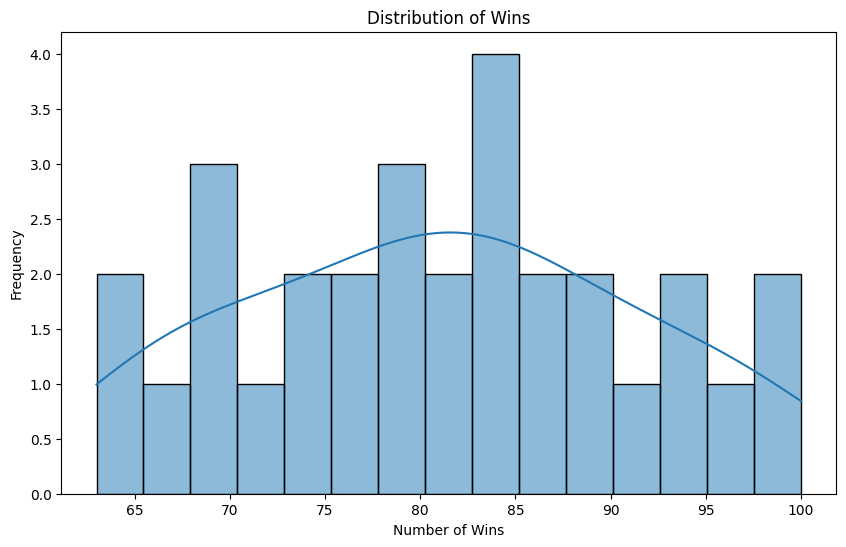

In [8]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['W'], bins=15, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.show()

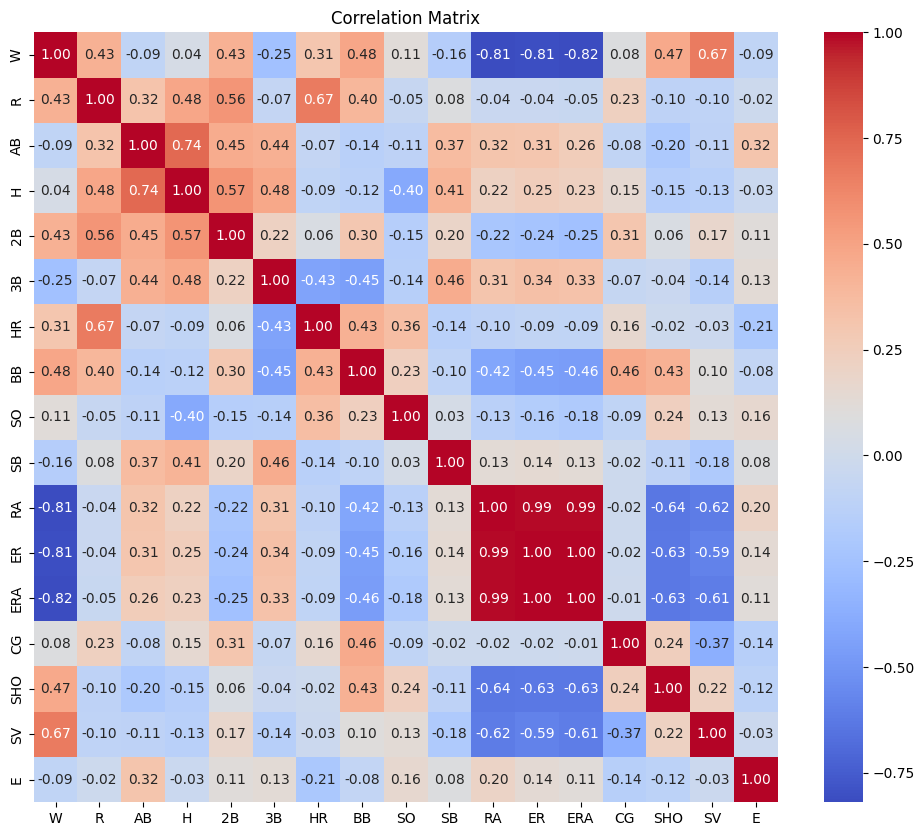

In [9]:
# Correlation Matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Selecting Features
selected_features = ['R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

# Creating Feature Matrix X and Target Variable y
X = df[selected_features]
y = df['W']

#Step 4: Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Model Selection and Training

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 5: Model Selection and Training

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Step 6: Model Evaluation

# Function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate Linear Regression
linear_mae, linear_mse, linear_r2 = evaluate_model(linear_model, X_test, y_test)
print(f'Linear Regression - Mean Absolute Error: {linear_mae}, Mean Squared Error: {linear_mse}, R-squared: {linear_r2}')

# Evaluate Decision Tree Regression
tree_mae, tree_mse, tree_r2 = evaluate_model(tree_model, X_test, y_test)
print(f'Decision Tree Regression - Mean Absolute Error: {tree_mae}, Mean Squared Error: {tree_mse}, R-squared: {tree_r2}')

# Evaluate Random Forest Regression
forest_mae, forest_mse, forest_r2 = evaluate_model(forest_model, X_test, y_test)
print(f'Random Forest Regression - Mean Absolute Error: {forest_mae}, Mean Squared Error: {forest_mse}, R-squared: {forest_r2}')


Linear Regression - Mean Absolute Error: 3.9436326652494813, Mean Squared Error: 29.47251400386571, R-squared: 0.7760163596919643
Decision Tree Regression - Mean Absolute Error: 9.333333333333334, Mean Squared Error: 118.66666666666667, R-squared: 0.09816339455351486
Random Forest Regression - Mean Absolute Error: 5.62666666666667, Mean Squared Error: 48.23363333333339, R-squared: 0.6334366054464847


In [13]:
# Assuming df is your original DataFrame
# Selecting the first row as an example (excluding the 'W' column)
new_data_sample = df.drop('W', axis=1).head(1)

# Ensure that the columns in new_data_sample match the columns used during training
# For example, if you trained the model on X_train, get the columns from X_train
columns_used_during_training = X_train.columns
new_data_sample = new_data_sample[columns_used_during_training]

# Predict the number of wins using the trained linear regression model
predicted_wins = linear_model.predict(new_data_sample)
print("Number of predicted wins (W):", predicted_wins)


Number of predicted wins (W): [96.51309545]


Linear Regression - Mean Absolute Error: 3.8929991369997268, Mean Squared Error: 27.94303250666707, R-squared: 0.7876400316149431


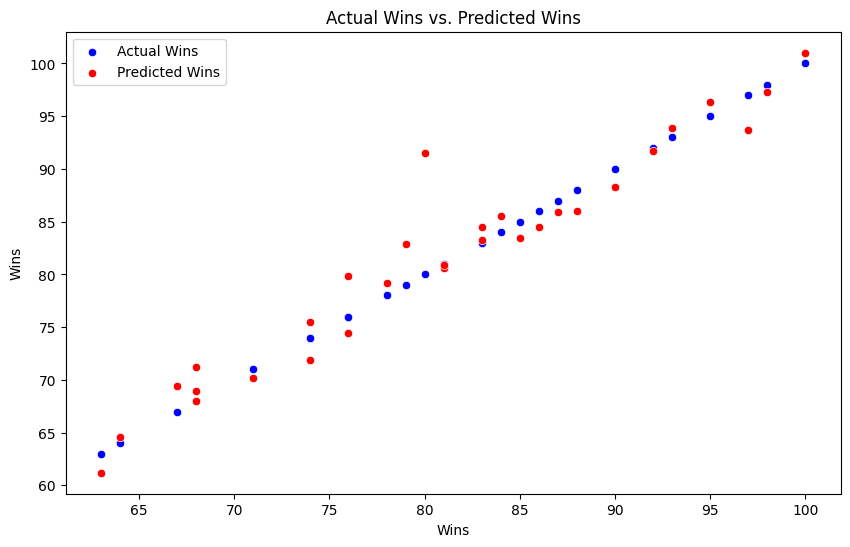

In [14]:
# Assuming df is your original DataFrame

# Selecting the features used during training (excluding the 'W' column)
features_used_during_training = df.drop('W', axis=1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_used_during_training, df['W'], test_size=0.2, random_state=42)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate Linear Regression
linear_mae, linear_mse, linear_r2 = evaluate_model(linear_model, X_test, y_test)
print(f'Linear Regression - Mean Absolute Error: {linear_mae}, Mean Squared Error: {linear_mse}, R-squared: {linear_r2}')

# Predict the wins using the trained linear regression model on the entire dataset
predicted_wins = linear_model.predict(features_used_during_training)

# Create a scatter plot to compare actual vs. predicted wins
plt.figure(figsize=(10, 6))

# Scatter plot for actual wins in blue
sns.scatterplot(x=df['W'], y=df['W'], color='blue', label='Actual Wins')

# Scatter plot for predicted wins in red
sns.scatterplot(x=df['W'], y=predicted_wins, color='red', label='Predicted Wins')

plt.title('Actual Wins vs. Predicted Wins')
plt.xlabel('Wins')
plt.ylabel('Wins')
plt.legend()
plt.show()
